#  Text processing software|

In [5]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\13054\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\13054\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\13054\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#  Processing data

In [7]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [10]:
#load data
spam_data = pd.read_csv("Spam-Classification.csv")
print(spam_data.head())

#seperate feature and target data
spam_classes_raw = spam_data["CLASS"] #ham or spam
spam_messages = spam_data["SMS"] #the message

  CLASS                                                SMS
0   ham   said kiss, kiss, i can't do the sound effects...
1   ham      &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2  spam  (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3  spam  * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4  spam  **FREE MESSAGE**Thanks for using the Auction S...


In [12]:
import nltk
import tensorflow as tf

#Custom tokenizer to remove stopwords and use lemmatization
def customtokenize(str):
    #Split string as tokens
    tokens=nltk.word_tokenize(str)
    #Filter for stopwords
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    #Perform lemmatization
    lemmatized=[lemmatizer.lemmatize(word) for word in nostop ]
    return lemmatized

from sklearn.feature_extraction.text import TfidfVectorizer

#Build a TF-IDF Vectorizer model
vectorizer = TfidfVectorizer(tokenizer=customtokenize)

#Transform feature input to TF-IDF
tfidf=vectorizer.fit_transform(spam_messages)

#Convert TF-IDF to numpy array
tfidf_array = tfidf.toarray()

#Build a label encoder for target variable to convert strings to numeric values.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
spam_classes = label_encoder.fit_transform(
                                spam_classes_raw)

#Convert target to one-hot encoding vector
spam_classes = tf.keras.utils.to_categorical(spam_classes,2)

print("TF-IDF Matrix Shape : ", tfidf.shape)
print("One-hot Encoding Shape : ", spam_classes.shape)

X_train,X_test,Y_train,Y_test = train_test_split( tfidf_array, spam_classes, test_size=0.10)

C:\Users\13054\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF Matrix Shape :  (1500, 4566)
One-hot Encoding Shape :  (1500, 2)


#  Building and evaluating the model

In [13]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

In [14]:
#Parameters for build
NB_CLASSES=2
N_HIDDEN=32

model = tf.keras.models.Sequential()


#addint layers
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(X_train.shape[1],),
                              name='Hidden-Layer-1',
                              activation='relu'))

model.add(keras.layers.Dense(N_HIDDEN,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 32)                146144    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 32)                1056      
                                                                 
 Output-Layer (Dense)        (None, 2)                 66        
                                                                 
Total params: 147266 (575.26 KB)
Trainable params: 147266 (575.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#  Training the model


Training Progress:
------------------------------------
Epoch 1/10


5/5 [==============================] - 1s 57ms/step - loss: 0.6914 - accuracy: 0.5611 - val_loss: 0.6827 - val_accuracy: 0.7519
Epoch 2/10
5/5 [==============================] - 0s 13ms/step - loss: 0.6731 - accuracy: 0.8852 - val_loss: 0.6608 - val_accuracy: 0.8593
Epoch 3/10
5/5 [==============================] - 0s 14ms/step - loss: 0.6438 - accuracy: 0.9333 - val_loss: 0.6311 - val_accuracy: 0.9185
Epoch 4/10
5/5 [==============================] - 0s 14ms/step - loss: 0.6069 - accuracy: 0.9694 - val_loss: 0.5967 - val_accuracy: 0.9296
Epoch 5/10
5/5 [==============================] - 0s 12ms/step - loss: 0.5629 - accuracy: 0.9722 - val_loss: 0.5587 - val_accuracy: 0.9333
Epoch 6/10
5/5 [==============================] - 0s 16ms/step - loss: 0.5148 - accuracy: 0.9796 - val_loss: 0.5172 - val_accuracy: 0.9407
Epoch 7/10
5/5 [==============================] - 0s 15ms/step - loss: 0.4651 - accuracy: 0.9759 - val_loss

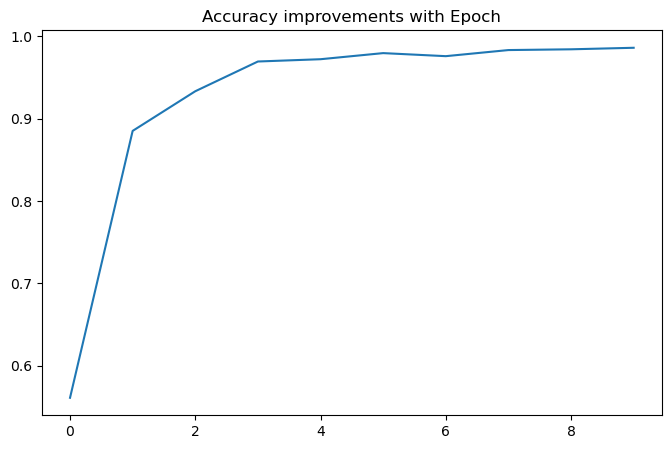


Evaluation against Test Dataset :
------------------------------------
5/5 [==============================] - 0s 2ms/step - loss: 0.3693 - accuracy: 0.9333


[0.3692541718482971, 0.9333333373069763]

In [15]:
#Make it verbose so we can see the progress
VERBOSE  = 1

#Setup Hyper Parameters for training
BATCH_SIZE = 256
EPOCHS = 10
VALIDATION_SPLIT = 0.2

print("\nTraining Progress:\n------------------------------------")

#Start training with X_train and Y_train data
history = model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

#  Saving the model

In [16]:
#Saving a model
    
model.save("spam_save")
    
#Loading a Model 
loaded_model = keras.models.load_model("spam_save")

#Print Model Summary
loaded_model.summary()

INFO:tensorflow:Assets written to: spam_save\assets


INFO:tensorflow:Assets written to: spam_save\assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 32)                146144    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 32)                1056      
                                                                 
 Output-Layer (Dense)        (None, 2)                 66        
                                                                 
Total params: 147266 (575.26 KB)
Trainable params: 147266 (575.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#  Predicting my own text

In [23]:
example1 = ["CONGRATULATIONS!! YOU'RE THE 1 BILLION'TH PERSON TO ENTER THIS WEBSITE.CLAIM YOUR 100.000 DOLLARS"]
example2 = ["Hi mom, I was wondering how you're doing. Sending love, best Chris"]
example3 = ["This event is completly free for all gender and is not monetized", "this class is very nice"]

def predict(example):
    
    #convert example into IF-IDF  vector 
    prediction_input = vectorizer.transform(example).toarray()

    print(prediction_input.shape)

    prediction = np.argmax(model.predict(prediction_input), axis = 1)
    print("Prediction Output:" , prediction)

    print("Prediction Classes are ", label_encoder.inverse_transform(prediction))
    
predict(example1)
predict(example2)
predict(example3)

(1, 4566)
1/1 [==============================] - 0s 22ms/step
Prediction Output: [1]
Prediction Classes are  ['spam']
(1, 4566)
1/1 [==============================] - 0s 17ms/step
Prediction Output: [0]
Prediction Classes are  ['ham']
(2, 4566)
1/1 [==============================] - 0s 13ms/step
Prediction Output: [1 0]
Prediction Classes are  ['spam' 'ham']
